### Python Code for parsing data off of BoxOfficeMojo

In [34]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
# boilerplate url
# i fucking hate that their default way to list the data is backwards like from december to january
url_pattern = 'https://www.boxofficemojo.com/weekly/by-year/{}/?sort=startDate&sortDir=asc&ref_=bo_wly__resort#table'

# List to store URLs for each year from 2000 to 2022
all_urls = []
for year in range(2000, 2023):
    url = url_pattern.format(year)
    all_urls.append(url) 

# List to store all the DataFrames
dfs = []

In [36]:
# Loop through each URL and read the first table using pd.read_html()
# Append the resulting dataframe to the list of dataframes I declared earlier
for url in all_urls:
    df = pd.read_html(url, header=0)[0]
    dfs.append(df)

# put the list of dataframes into on single dataframe
final_data = pd.concat(dfs, ignore_index=True)
# drop columns we wont be using or columns that have too many missing values
# we drop the dates column bc the way they set up dates in the tables is useless
columns_to_drop = ['Genre', 'Budget', 'Running Time', 'Dates']
final_data = final_data.drop(columns_to_drop, axis=1)
final_data

,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Week,Long Weekend
0,"$91,647,587",-31.9%,"$130,929,381",-19%,56,Stuart Little,1,False
1,"$105,023,114",+14.6%,"$146,456,782",+11.9%,57,Next Friday,2,False
2,"$67,541,452",-35.7%,"$105,493,208",-28%,58,Next Friday,3,False
3,"$53,744,545",-20.4%,"$86,115,844",-18.4%,60,Eye of the Beholder,4,False
4,"$81,219,487",+51.1%,"$110,651,459",+28.5%,55,Scream 3,5,False
...,...,...,...,...,...,...,...,...
1195,"$65,533,485",-39.4%,"$71,808,894",-37.2%,59,Black Panther: Wakanda Forever,48,False
1196,"$45,214,764",-31%,"$51,441,972",-28.4%,58,Black Panther: Wakanda Forever,49,False
1197,"$232,765,223",+414.8%,"$236,324,722",+359.4%,47,Avatar: The Way of Water,50,False
1198,"$242,130,042",+4%,"$246,487,640",+4.3%,50,Avatar: The Way of Water,51,False


In [37]:
# need to create our own dates from the beginning of 2000 to the end of the data
date_range = pd.date_range(start='2000-01-01', periods=len(final_data), freq='W')
# create pandas dataframe with datetime column
df = pd.DataFrame({'dates': date_range})
# add the datetime column to the existing dataframe
final_data['dates'] = df['dates']
final_data

,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Week,Long Weekend,dates
0,"$91,647,587",-31.9%,"$130,929,381",-19%,56,Stuart Little,1,False,2000-01-02
1,"$105,023,114",+14.6%,"$146,456,782",+11.9%,57,Next Friday,2,False,2000-01-09
2,"$67,541,452",-35.7%,"$105,493,208",-28%,58,Next Friday,3,False,2000-01-16
3,"$53,744,545",-20.4%,"$86,115,844",-18.4%,60,Eye of the Beholder,4,False,2000-01-23
4,"$81,219,487",+51.1%,"$110,651,459",+28.5%,55,Scream 3,5,False,2000-01-30
...,...,...,...,...,...,...,...,...,...
1195,"$65,533,485",-39.4%,"$71,808,894",-37.2%,59,Black Panther: Wakanda Forever,48,False,2022-11-27
1196,"$45,214,764",-31%,"$51,441,972",-28.4%,58,Black Panther: Wakanda Forever,49,False,2022-12-04
1197,"$232,765,223",+414.8%,"$236,324,722",+359.4%,47,Avatar: The Way of Water,50,False,2022-12-11
1198,"$242,130,042",+4%,"$246,487,640",+4.3%,50,Avatar: The Way of Water,51,False,2022-12-18


In [38]:
# move the dates column to the first position in the dataframe
last_col = final_data.pop('dates')
final_data.insert(0, 'dates', last_col)
# parse through and replace all non-numeric characters with nothing
# convert object type columns to numeric columns
final_data['Overall Gross'] = final_data['Overall Gross'].astype(str).str.replace(',', '').str.replace('$', '')
final_data['Overall Gross'] = pd.to_numeric(final_data['Overall Gross'], errors='coerce')
final_data['Top 10 Gross'] = final_data['Top 10 Gross'].astype(str).str.replace(',', '').str.replace('$', '')
final_data['Top 10 Gross'] = pd.to_numeric(final_data['Top 10 Gross'], errors='coerce')
final_data

,dates,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Week,Long Weekend
0,2000-01-02,91647587,-31.9%,130929381,-19%,56,Stuart Little,1,False
1,2000-01-09,105023114,+14.6%,146456782,+11.9%,57,Next Friday,2,False
2,2000-01-16,67541452,-35.7%,105493208,-28%,58,Next Friday,3,False
3,2000-01-23,53744545,-20.4%,86115844,-18.4%,60,Eye of the Beholder,4,False
4,2000-01-30,81219487,+51.1%,110651459,+28.5%,55,Scream 3,5,False
...,...,...,...,...,...,...,...,...,...
1195,2022-11-27,65533485,-39.4%,71808894,-37.2%,59,Black Panther: Wakanda Forever,48,False
1196,2022-12-04,45214764,-31%,51441972,-28.4%,58,Black Panther: Wakanda Forever,49,False
1197,2022-12-11,232765223,+414.8%,236324722,+359.4%,47,Avatar: The Way of Water,50,False
1198,2022-12-18,242130042,+4%,246487640,+4.3%,50,Avatar: The Way of Water,51,False


A simple plot for the weekly overall gross data throughout the last twenty years.

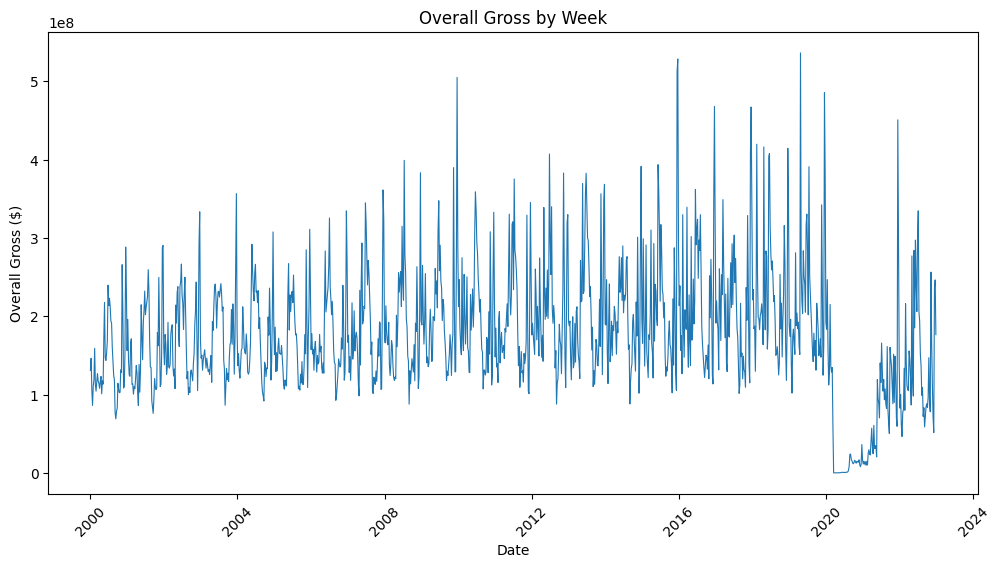

In [39]:
# set the figure size
plt.figure(figsize=(12, 6))
# plot the data
plt.plot(final_data['dates'], final_data['Overall Gross'], linewidth = .8)
# set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Overall Gross ($)')
plt.title('Overall Gross by Week')
# rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# show the plot
plt.show()


Creates the CSV file for general use.

In [40]:
final_data.to_csv('box_office_data.csv', index=False)